<a href="https://colab.research.google.com/github/DanielGreiner/Masterarbeit/blob/main/1D_Model_comparison_to_Aspen_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REACTIONS

  \begin{array}{lll}
  \text{Methanol steam reforming (MSR):}&\kern 3pc CH_3OH_{(g)}+H_2O_{(g)}\kern 0.5pc{\overset{k_{1, eff}}{\rightleftharpoons}}\kern 0.5pc 3H_{2(g)}+CO_{2(g)}&\kern 3pc\Delta_r H_{m}^{o}= + 49\enspace \frac{kJ}{mol} \\
  \text{Methanol decomposition (MD):}&\kern 3pc CH_3OH_{(g)}\kern 0.5pc {\overset{k_{2, eff}}{\rightleftharpoons}}\kern 0.5pc 2H_{2(g)}+CO_{(g)}&\kern 3pc\Delta_r H_{m}^{o}= + 91\enspace \frac{kJ}{mol} \\
  \end{array}


# LOAD LIBRARIES

In [ ]:
# @title import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import torch as to
from scipy.integrate import odeint

# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# @title check library versions
print("tensorflow:" + str(tf.__version__))
print("numpy:" + str(np.__version__))
print("pandas:" + str(pd.__version__))
#print("torch:" + str(to.__version__))

tensorflow:2.14.0
numpy:1.23.5
pandas:1.5.3


# CODE

In [ ]:
# @title extract data

aspen = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/Masterarbeit Colabs/Experimental data - Excel sheets/Results 720mm reactor by temp.xlsx')
model = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/Masterarbeit Colabs/Experimental data - Excel sheets/aspen model comparisons.xlsx')

AspenPoints = len(aspen.sheet_names)
AspenResults = np.zeros([AspenPoints, 11, 6])
ModelResults = np.zeros([AspenPoints, 101, 6])



for i in range(AspenPoints):
  df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Masterarbeit Colabs/Experimental data - Excel sheets/Results 720mm reactor by temp.xlsx', i)

  df = df[['H2', 'H2O', 'CO', 'CO2', 'MEOH-1', 'Length']]
  tempres = df.to_numpy()
  res = np.delete(tempres, (0), axis=0)
  AspenResults [i, :, :] = res

for i in range(AspenPoints):
  df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Masterarbeit Colabs/Experimental data - Excel sheets/aspen model comparisons.xlsx', i)

  tempres = df.to_numpy()
  res = np.delete(tempres, (0), axis=1)
  ModelResults [i, :, :] = res


In [ ]:
# @title variables

sheets = aspen.sheet_names
AspenStartingTemp = int(''.join(filter(str.isdigit, sheets[0])))
AspenSecondTemp = int(''.join(filter(str.isdigit, sheets[1])))
diff = AspenSecondTemp - AspenStartingTemp
T_min = AspenStartingTemp + 273
temperature_arr = np.arange(0, AspenPoints)*diff + T_min
temperature_arr
steps_Aspen = 100

# set aspen specific reactor data
L_R_Aspen = 0.720
d_R_Aspen = 0.133
r_R_Aspen = d_R_Aspen/2
A_R_Aspen = np.pi*np.power(r_R_Aspen, 2, dtype=float)
V_R_Aspen = A_R_Aspen*L_R_Aspen

# set aspen specific catalyst data, create differention variable and size
m_cat_Aspen = 7.95
m_cat_0_Aspen = 0
dm_cat_Aspen = (m_cat_Aspen-m_cat_0_Aspen)/steps_Aspen
m_cat_span_Aspen = np.arange(m_cat_0_Aspen, m_cat_Aspen + dm_cat_Aspen, dm_cat_Aspen)
dens_cat_Aspen = m_cat_Aspen/V_R_Aspen

# PLOTS

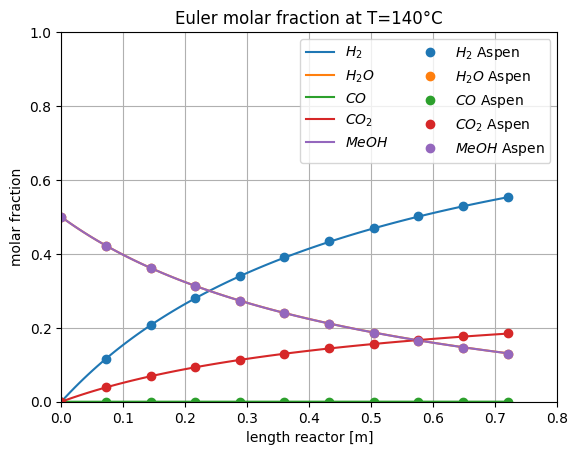

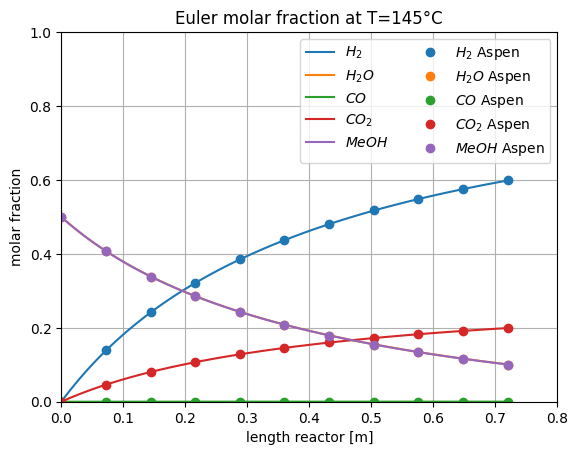

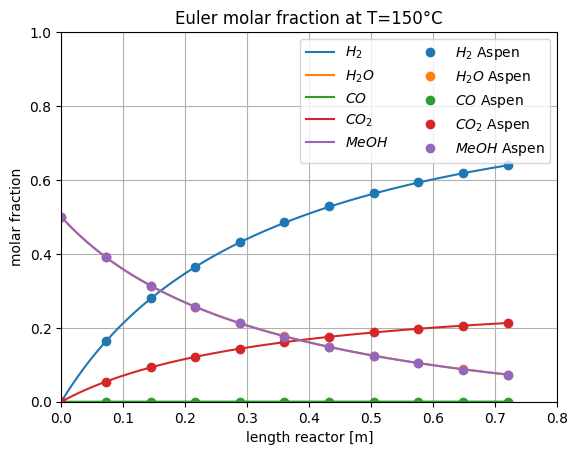

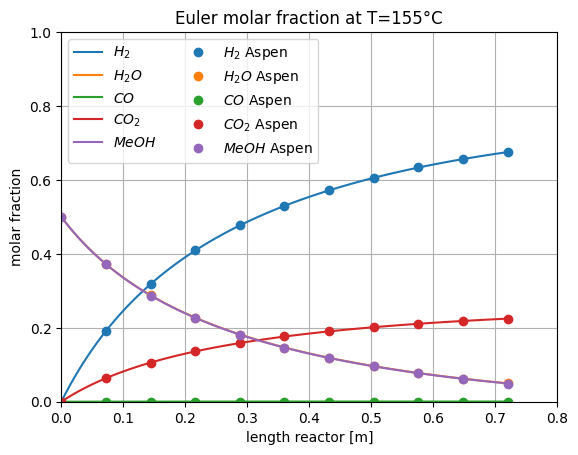

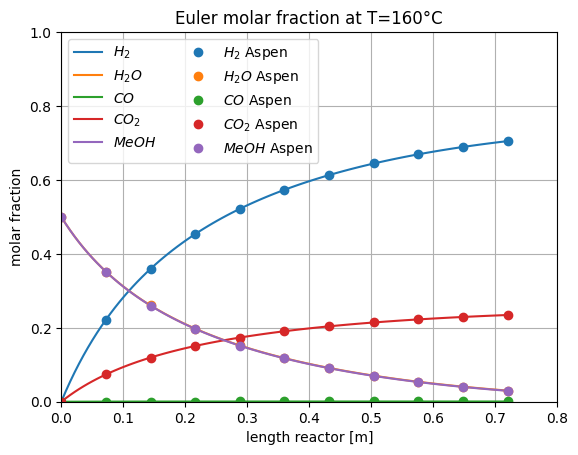

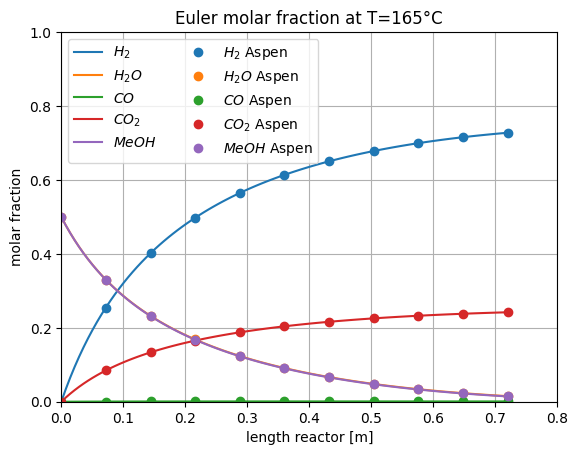

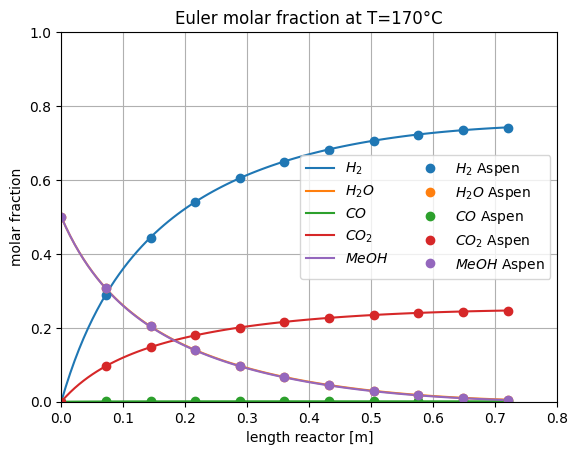

In [ ]:
# @title main temp loop plots compared with aspen
'''
plots all available molar fraction plots compared to the aspen results
'''
for i in range (AspenPoints):
  plt.figure(i)
  t = temperature_arr[i]-273
  plt.plot(ModelResults[i, :, 5], ModelResults[i, :, 0], label='$H_2$', color = 'tab:blue')
  plt.plot(ModelResults[i, :, 5], ModelResults[i, :, 1], label='$H_2O$', color = 'tab:orange')
  plt.plot(ModelResults[i, :, 5], ModelResults[i, :, 2], label='$CO$', color = 'tab:green')
  plt.plot(ModelResults[i, :, 5], ModelResults[i, :, 3], label='$CO_2$', color = 'tab:red')
  plt.plot(ModelResults[i, :, 5], ModelResults[i, :, 4], label='$MeOH$', color = 'tab:purple')
  plt.plot(AspenResults[i, :, 5], AspenResults[i, :, 0], label='$H_2$ Aspen', marker='o', linestyle='None')
  plt.plot(AspenResults[i, :, 5], AspenResults[i, :, 1], label='$H_2O$ Aspen', marker='o', linestyle='None')
  plt.plot(AspenResults[i, :, 5], AspenResults[i, :, 2], label='$CO$ Aspen', marker='o', linestyle='None')
  plt.plot(AspenResults[i, :, 5], AspenResults[i, :, 3], label='$CO_2$ Aspen', marker='o', linestyle='None')
  plt.plot(AspenResults[i, :, 5], AspenResults[i, :, 4], label='$MeOH$ Aspen', marker='o', linestyle='None')
  # plt.plot(AspenResults[i, :, 5], AspenResults[i, :, 0], marker='o', color = 'tab:blue')
  # plt.plot(AspenResults[i, :, 5], AspenResults[i, :, 1], marker='o', color = 'tab:orange')
  # plt.plot(AspenResults[i, :, 5], AspenResults[i, :, 2], marker='o', color = 'tab:green')
  # plt.plot(AspenResults[i, :, 5], AspenResults[i, :, 3], marker='o', color = 'tab:red')
  # plt.plot(AspenResults[i, :, 5], AspenResults[i, :, 4], marker='o', color = 'tab:purple')
  plt.title('Euler molar fraction at T=%i' %t + '°C')
  plt.axis((0, 0.800, 0, 1))
  plt.legend(loc='best', ncol=2)
  plt.grid()
  plt.xlabel("length reactor [m]")
  plt.ylabel ("molar fraction")

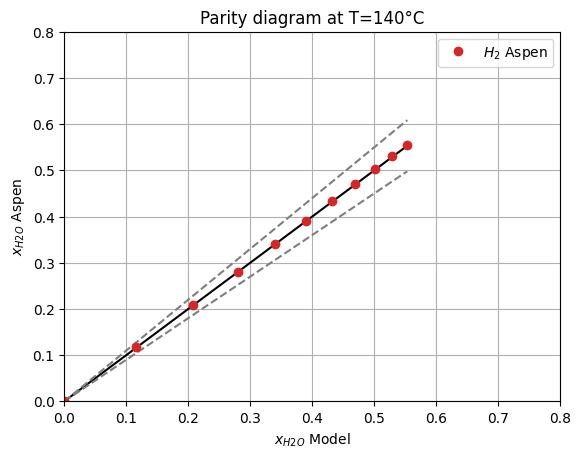

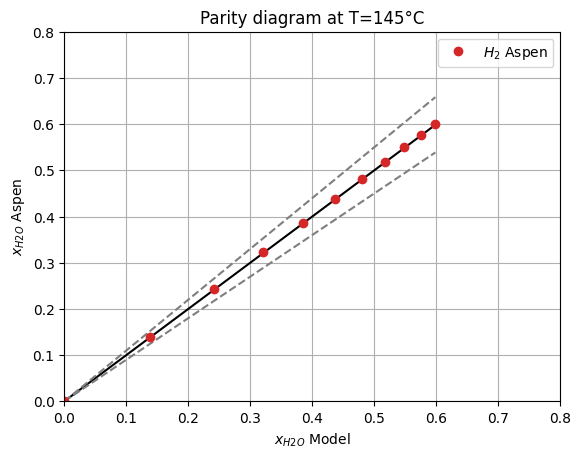

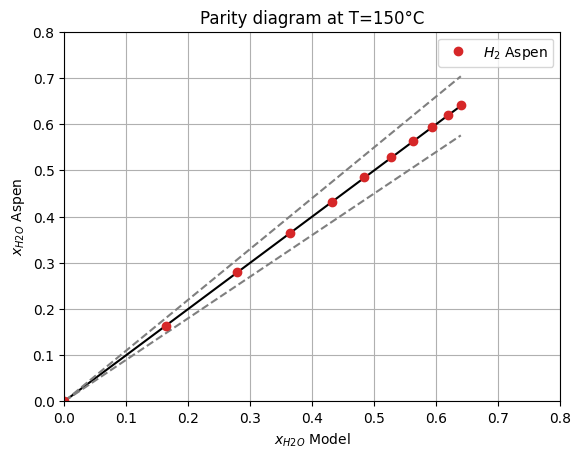

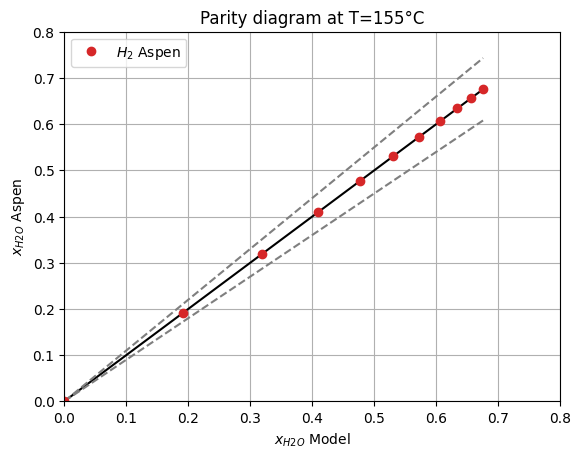

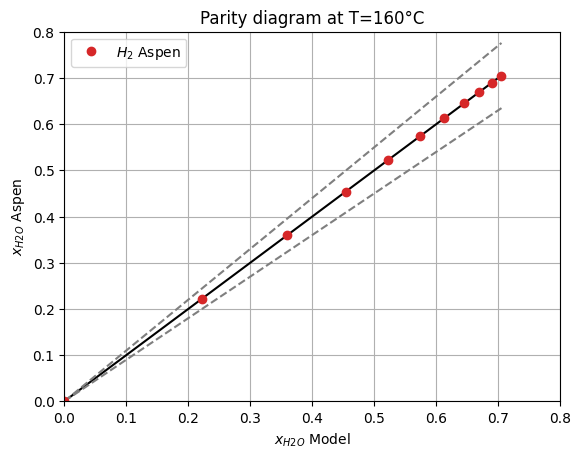

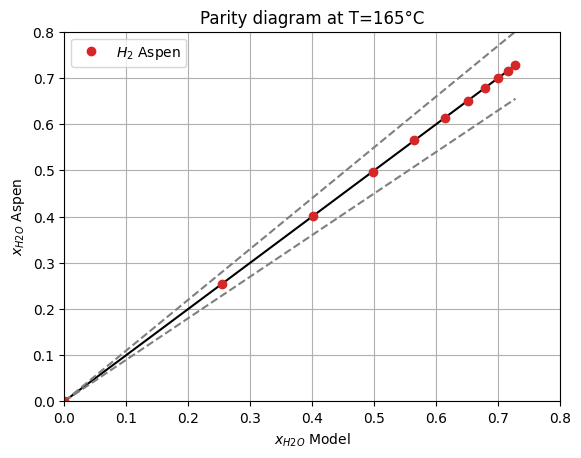

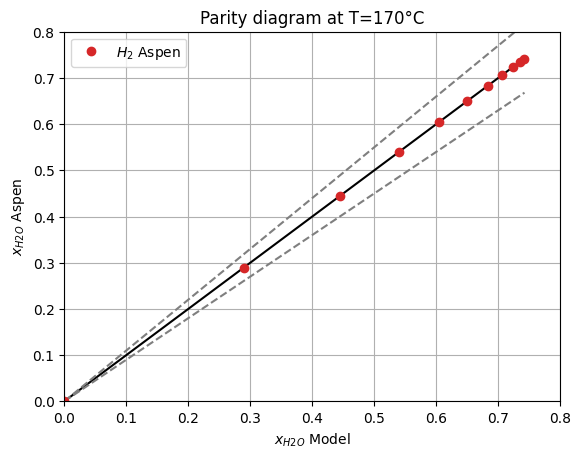

In [ ]:
# @title main temp loop plots compared with aspen
'''
creates and plots a parity diagram to compare aspen and this model
only compares hydrogen
'''
# model data has to be cut down to fit aspen data points
ParityModelCompData = np.zeros([AspenPoints, 11])
tempind = int(steps_Aspen/10)

# fills comparative array with hydrogen results from every one of the 2D arrays contained in 3D master array
for i in range(AspenPoints):
  for j in range(tempind+1):
    ParityModelCompData [i, j] = ModelResults[i, j*tempind, 0]

# plots parity diagrams
for i in range (AspenPoints):
  plt.figure(i)
  t = temperature_arr[i]-273
  pEulTempsMinus10 = 0.9*ModelResults[i, :, 0]
  pEulTempsPlus10 = 1.1*ModelResults[i, :, 0]
  plt.plot(ModelResults[i, :, 0], ModelResults[i, :, 0], color = 'k')
  plt.plot(ModelResults[i, :, 0], pEulTempsMinus10, color = 'tab:gray', linestyle ='--')
  plt.plot(ModelResults[i, :, 0], pEulTempsPlus10, color = 'tab:gray', linestyle ='--')
  plt.plot(ParityModelCompData [i , :], AspenResults[i, :, 0], label='$H_2$ Aspen', marker='o', linestyle='None', color = 'tab:red')
  plt.title('Parity diagram at T=%i' %t + '°C')
  plt.axis((0, 0.8, 0, 0.8))
  plt.legend(loc='best', ncol=2)
  plt.grid()
  plt.xlabel("$x_{H2O}$ Model")
  plt.ylabel ("$x_{H2O}$ Aspen")

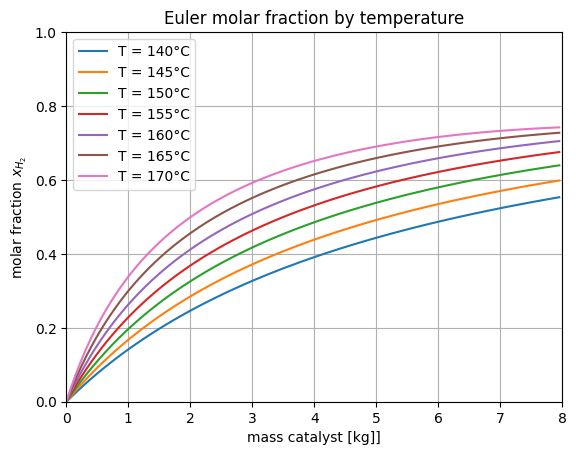

In [ ]:
# @title Temp comparison molar fraction
'''
changes x axis to mass catalyst and compares hydrogen molar fraction across different temperatures
'''
# copy to not change initial array
pEulTempsComp = ModelResults.copy()

# change x axis from length to mass catalyst
for k in range (AspenPoints):
  pEulTempsComp[k, :, 5] = pEulTempsComp[k, :, 5] * dens_cat_Aspen * A_R_Aspen

# plots available data
for i in range (AspenPoints):
  plt.figure(1)
  t = temperature_arr[i]-273
  plt.plot(pEulTempsComp[i, :, 5], pEulTempsComp[i, :, 0], label='T = %i' %t + '°C')
  plt.title('Euler molar fraction by temperature')
  plt.axis((0, 8, 0, 1))
  plt.legend(loc='best')
  plt.grid()
  plt.xlabel("mass catalyst [kg]]")
  plt.ylabel ("molar fraction $x_{H_2}$")


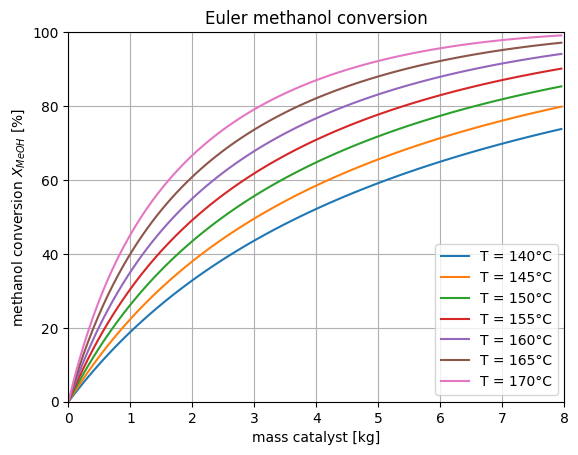

In [ ]:
# @title Temp comparison methanol conversion rate
'''
calculates methanol conversion and plots it across different temperatures
'''

pEulTempsX = ModelResults.copy()

for j in range (AspenPoints):
  pEulTempsX[j, :, 4] = (1-pEulTempsX[j ,: ,4]/pEulTempsX[j ,0 ,4])*100
  plt.figure(1)
  t = temperature_arr[j]-273
  plt.plot(pEulTempsComp[j, :, 5], pEulTempsX[j, :, 4], label='T = %i' %t + '°C')
  plt.title("Euler methanol conversion")
  plt.axis((0, 8, 0, 100))
  plt.legend(loc='best')
  plt.grid()
  plt.xlabel("mass catalyst [kg]")
  plt.ylabel ("methanol conversion $X_{MeOH}$ [%]")